# Сборный проект: Анализ продаж компьютерных игр

Задача : 

 -проанализировать данные  о продажах из открытых источников 
 
 -выявить закономерности определяющие успешность игры 
 
 -определить потенциально успешный продукт для планирования эффективной рекламной компании 

## Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

 ESRB :
 
 «EC» («Early childhood») — «Для детей младшего возраста»
 
 «E» («Everyone») — «Для всех»
 
 «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше
 
 «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 
 
 «M» («Mature») — «Для взрослых»
 
 «AO» («Adults Only 18+») — «Только для взрослых»
 
 «RP» («Rating Pending») — «Рейтинг ожидается»
 
 "K-A"-дети и взрослые  
 
 
 

##  Изучение общей информации о данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import datetime as dt
import requests 
from IPython.display import display_html


import warnings

In [2]:
# открываем файл
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# приведем названия к нижнему регистру
df.columns = df.columns.str.lower()

In [5]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
# общая информация о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


 В данных обнаружены пропуски
    

In [7]:
# подсчет пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удалим пропуски в столбцах name и genre( по 2 пропуска) и year_of_release( 269 пропусков -1,61% от общего количества ) их немного.В других столбцах удалять не будем , чтобы не искажать данные 

In [8]:
df.dropna(subset=['name', 'genre','year_of_release'], inplace=True)

В столбце user_score  кроме  NaN имеются и другие данные 'tbd', что значит "to be determined ("to be defined") -  - предстоит определить,т.е. фактически пропуск в данных и может быть заменен на nan 

In [9]:
# Просмотр уникальных названий в столбце
df['user_score'].sort_values().unique() 

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [10]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.3       2
1.1       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [11]:
df['user_score']=df['user_score'].replace('tbd',np.nan)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>

In [12]:
# Просмотр уникальных названий в столбце
df['user_score'].sort_values().unique() 

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [13]:
df['rating'] = df['rating'].fillna(value='ND')
df['rating'].sort_values().unique() 

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'ND', 'RP', 'T'], dtype=object)

In [14]:
# проверим на дубликаты
df.duplicated().sum()

0

 При изучении  общей информации замечены несоответствующие типы данных в столбце с годом выпуска и user_score. 
    Замена типов данных
    


In [15]:
#замена данных на целочисленный в столбце год релиза 
df['year_of_release']=df['year_of_release'].astype('int')

In [16]:
# замена данных с типа 
df['user_score'] = df['user_score'].astype('float')


In [17]:
# общая информация о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [18]:
#Создадим столбец с суммарными продажами во всех регионах 
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 

In [19]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,ND,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,ND,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,ND,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,ND,28.31


Вывод из пункта :

Перевели  названия столбцов в нижний регистр.

В данных обнаружены пропуски. Удалены пропуски в столбцах name и genre( по 2 пропуска) и year_of_release( 269 пропусков -1,61% от общего количества ) их немного. Пропуски в столбце рейтингов ESRB заменила на аббревиатуру ND - не определен,т.к. значение замене не подлежит . Пропуски в столбцах рейтингов критиков и пользователей оставим без изменений, чтобы не искажать данные. Они связаны, вероятно, с тем, что не каждая игра удостаивалась оценки критиков или же игры не вышли недавно и не успели получить оценок пользователей или широкого распостранения     

При изучении общей информации замечены несоответствующие типы данных в столбце с годом выпуска и user_score. Замена типов данных в годе релиза на целочисленный тип и в user_score на тип float как и вдругих оценках.
В столбце user_score кроме NaN имеются и другие данные 'tbd', что значит "to be determined ("to be defined") - - предстоит определить,т.е. фактически пропуск в данных  заменили на nan.

Дубликаты отсутствуют .

Создан столбец  с суммарными продажами во всех регионах .



In [20]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Шаг 3. Исследовательский анализ данных

 ### Сколько игр выпускалось в разные годы
 

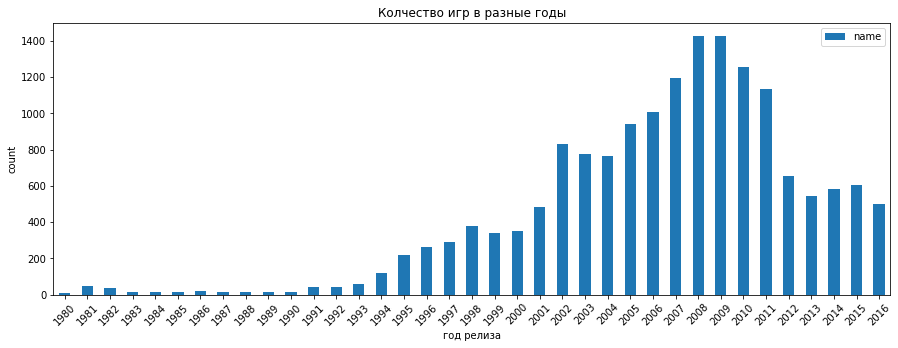

In [21]:
# сколько игр выпускалось в разные годы
df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index().plot(x='year_of_release', y= 'name', kind='bar', figsize=(15,5), title='Колчество игр в разные годы')
plt.ylabel('count')
plt.xlabel('год релиза')
plt.xticks(rotation = '45')
plt.show()


In [22]:
#сводная таблица продаж по годам 
df_year=df.pivot_table(index='year_of_release', values='total_sales',aggfunc='sum')
df_year

,total_sales
year_of_release,
1980,11.38
1981,35.68
1982,28.88
1983,16.80
1984,50.35
1985,53.95
1986,37.08
1987,21.70
1988,47.21


In [23]:
# топ годов продаж
df_year_top=df_year.sort_values(by='total_sales', ascending=False)
df_year_top.head(10)

,total_sales
year_of_release,
2008,671.50
2009,658.82
2007,604.75
2010,590.13
2006,517.71
2011,507.58
2005,457.82
2004,418.68
2002,394.97


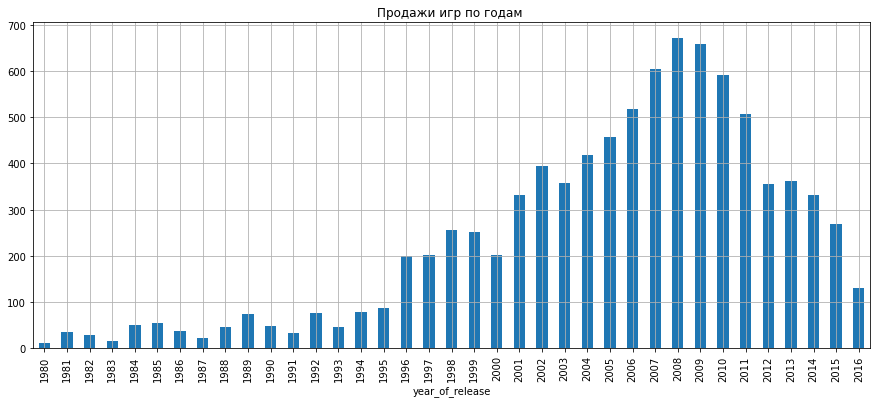

In [24]:
df_year['total_sales'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Продажи игр по годам ', 
                                      grid=True)
plt.show()

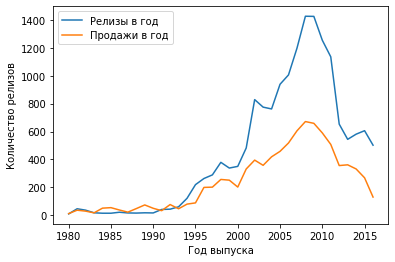

In [25]:
plt.plot(df.groupby('year_of_release')['name'].count(), label='Релизы в год')
plt.plot(df.groupby('year_of_release')['total_sales'].sum(), label='Продажи в год')
plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.show()

До 1994 года количество релизов в год не превышало 100,эти данные сложно назвать актуальными и из-за  временной давности. Думаю,  информацию до 1994 анализировать не стоит 

In [26]:
#выделение  актуальных строк после 1994 года
df_actual= df.query('year_of_release>=1994')
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,ND,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,ND,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,ND,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,ND,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,ND,0.01


### Продажи по платформам. Платформы с наибольшими суммарными продажами.Распределение по годам

In [27]:
#Платформы с наибольшими суммарными продажами
top_platform = df_actual.pivot_table(index=('platform'),values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
top_platform.head(10)



,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [28]:
# создаем список топовых платформ и переменную с индексами
top_platform_list = list(df_actual.pivot_table(index=('platform'),values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10).index)

top =top_platform_list[0:10]
top

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [29]:
#сводная таблица топовых платформ с продажами по годам 
top_platform_year=df_actual[(df_actual['platform'].isin(top))].pivot_table(index=['platform','year_of_release'],values='total_sales', aggfunc='sum').sort_index().reset_index()

top_platform_year.sort_values(by='total_sales', ascending=False).head(10)

,platform,year_of_release,total_sales
38,PS2,2004,211.81
76,Wii,2009,206.97
36,PS2,2002,205.38
37,PS2,2003,184.31
75,Wii,2008,171.32
89,X360,2010,170.03
28,PS,1998,169.49
35,PS2,2001,166.43
39,PS2,2005,160.66
51,PS3,2011,156.78


In [30]:
# по группировке таблицы проверим,что у нас нужный топ платформ и суммы продаж совпадают 
top_platform_year.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

In [31]:
top_platform_group =df_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platform_group


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES      84.67
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.13
WS         1.42
NG         1.23
SCD        0.36
TG16       0.16
NES        0.11
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64

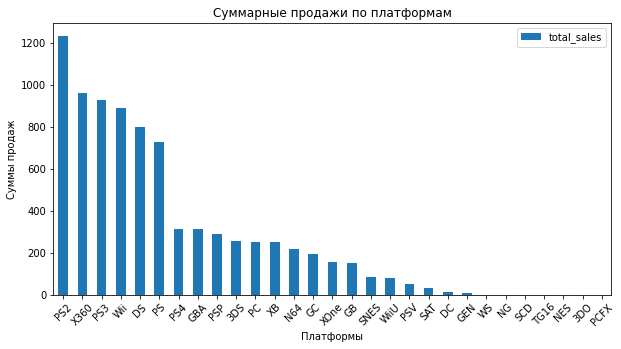

In [32]:
top_platform.plot(kind='bar',title='Суммарные продажи по платформам', xlabel='Платформы',
ylabel='Суммы продаж',rot=45,figsize=(10, 5),legend=True)
plt.show()

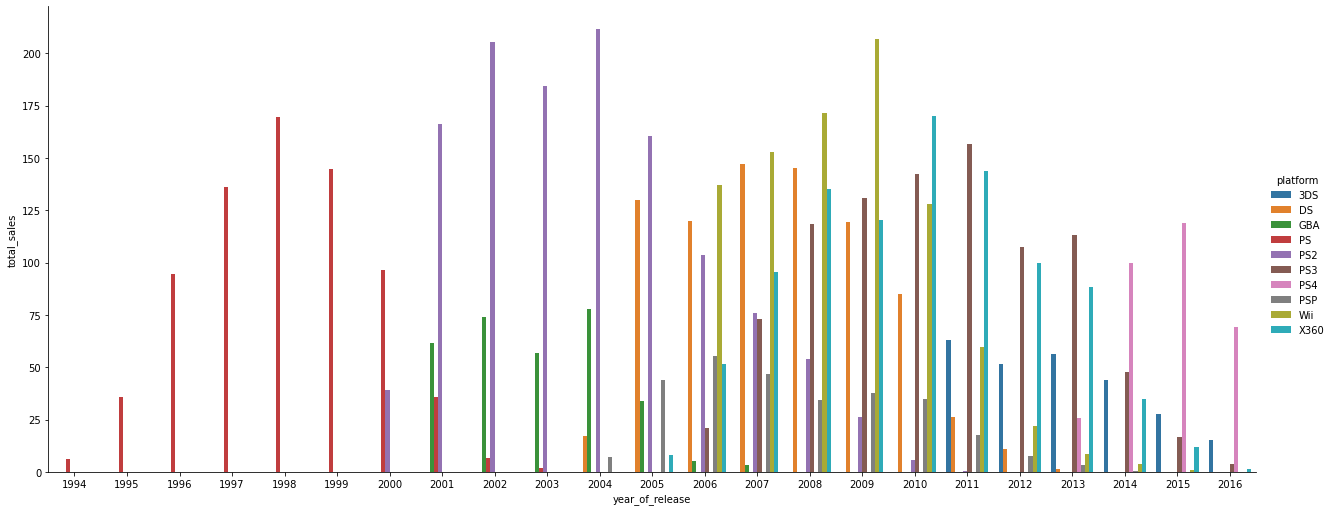

In [33]:
sns.catplot(x="year_of_release", y="total_sales", hue="platform", kind="bar", data=top_platform_year, height=7, aspect=2.5)
plt.show()

### характерный срок жизни платформ

In [34]:
# таблица со "сроками жизни" платформ  по всем данным ( возмем  первичные данные без фильтра с 1994)
life_time = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
#добавление столбца подсчета разницы
life_time['count']=life_time['max']-life_time['min']
life_time['count']

0      9
1      1
2      5
3     10
4     28
5     13
6      7
7      6
8      4
9      0
10     6
11    11
12     3
13    31
14     0
15     9
16    11
17    10
18     3
19    11
20     5
21     5
22     1
23     9
24     0
25     2
26    10
27     4
28    11
29     8
30     3
Name: count, dtype: int64

In [35]:
display(life_time.sort_values(by='count',ascending=False))

,platform,min,max,count
,,year_of_release,year_of_release,
13,PC,1985,2016,31
4,DS,1985,2013,28
5,GB,1988,2001,13
28,X360,2005,2016,11
19,PSP,2004,2015,11
16,PS2,2000,2011,11
11,NES,1983,1994,11
3,DC,1998,2008,10
26,Wii,2006,2016,10


In [36]:
# Комментарий ревьюера 2
display(temp[temp['platform'] == 'DS'].year_of_release.min())
temp = temp[(temp['platform'] == 'DS') & (temp['year_of_release'] != 1985)]
temp[temp['platform'] == 'DS'].year_of_release.min()

1985

2004

In [37]:
df.loc[(df['platform']=='DS')&(df['year_of_release']==1985),'year_of_release']=2004

In [38]:
df['platform'].where(~((df['platform']=='DS')&(df['year_of_release']==1985)), other=2004, inplace=True)


In [39]:
display(life_time[['count']].describe())

,count
,
count,31.000000
mean,7.612903
std,6.998464
min,0.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,31.000000


In [40]:
# таблица со "сроками жизни"  топ-платформ  
lifetimetop_platform=top_platform_year.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()

In [41]:
#добавление столбца подсчета лет
lifetimetop_platform['count']=life_time['max']-life_time['min']
lifetimetop_platform['count']

0     9
1     1
2     5
3    10
4    28
5    13
6     7
7     6
8     4
9     0
Name: count, dtype: int64

In [42]:
display(lifetimetop_platform.sort_values(by='count',ascending=False))

,platform,min,max,count
,,year_of_release,year_of_release,
4,PS2,2000,2011,28
5,PS3,2006,2016,13
3,PS,1994,2003,10
0,3DS,2011,2016,9
6,PS4,2013,2016,7
7,PSP,2004,2015,6
2,GBA,2000,2007,5
8,Wii,2006,2016,4
1,DS,2004,2013,1


In [43]:
display(lifetimetop_platform[['count']].describe())

,count
,
count,10.000000
mean,8.300000
std,7.972871
min,0.000000
25%,4.250000
50%,6.500000
75%,9.750000
max,28.000000


Заметен  большой разброс по количеству лет работы  платформ как среди всех данных так и  в топовых платформах  
    
Но медианный срок существования платформ около 8лет
    
Самая долгоживущая из платформ - РС(30 лет). 
Платформа  входит в топ-десять, хотя её ежегодные продажи не высоки. 
Для других ТОП-10 платформ характерен резкий рост в течение первого года-двух со времени релиза лет, плато  около 2-3 лет, далее резкое падение

  


### Актуальный период для прогноза на 2017 год.

Основываясь среднем цикле жизни игровой платформы на рынке,и динамике продаж возьмем для анализа данные  с 2013 года(т.е. примерную середину цикла жизна платформ) . Платформы старше 6 лет уже снизились в продажах, находясь в стадии "доживания" 

In [44]:
# Выбор новых актуальных  платформ
actual_period = df_actual.query('platform in @top and total_sales > 5 and year_of_release>2012')


In [45]:
actual_period.sort_values(by='total_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,ND,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,ND,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,ND,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [46]:
actual_period ['platform'].value_counts()

PS4     10
3DS      5
PS3      5
X360     3
Name: platform, dtype: int64

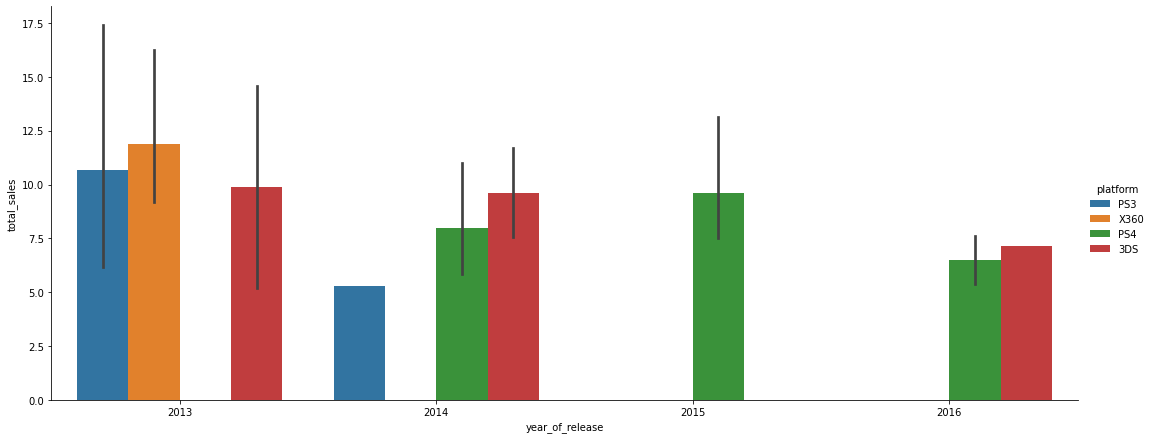

In [47]:
sns.catplot(x="year_of_release", y="total_sales", hue="platform", kind="bar", data=actual_period, height=6, aspect=2.5);


In [48]:
actual_new=df_actual.query(' year_of_release>2012')

In [49]:
actual_new.sort_values(by='total_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,ND,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16264,Worms: WMD,XOne,2016,Action,0.01,0.00,0.00,0.00,75.0,8.1,E10+,0.01
16267,The Book of Unwritten Tales 2,WiiU,2016,Adventure,0.00,0.01,0.00,0.00,NaN,NaN,T,0.01
16270,Hyakka Yakou,PSV,2015,Action,0.00,0.00,0.01,0.00,NaN,NaN,ND,0.01
16273,Doki-Doki Universe,PSV,2013,Adventure,0.00,0.01,0.00,0.00,66.0,5.7,E10+,0.01


In [50]:
actual_new['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

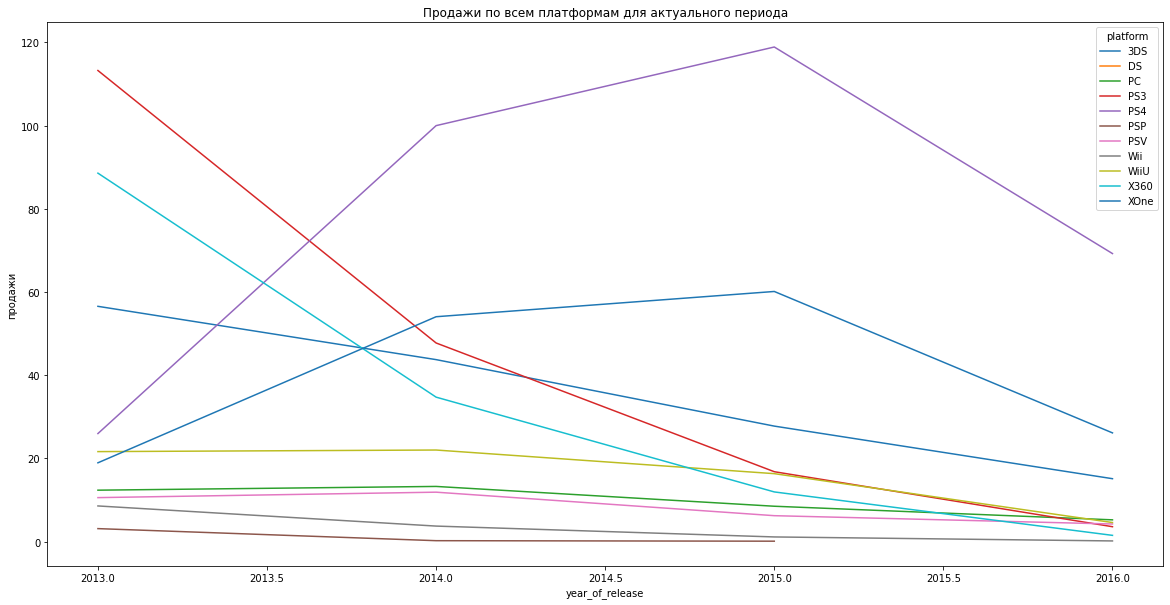

In [51]:
# визуализируем на графике продажи по всем платформам для актуального периода
actual_new.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(20,10), title='Продажи по всем платформам для актуального периода')
plt.ylabel('продажи')
plt.show()


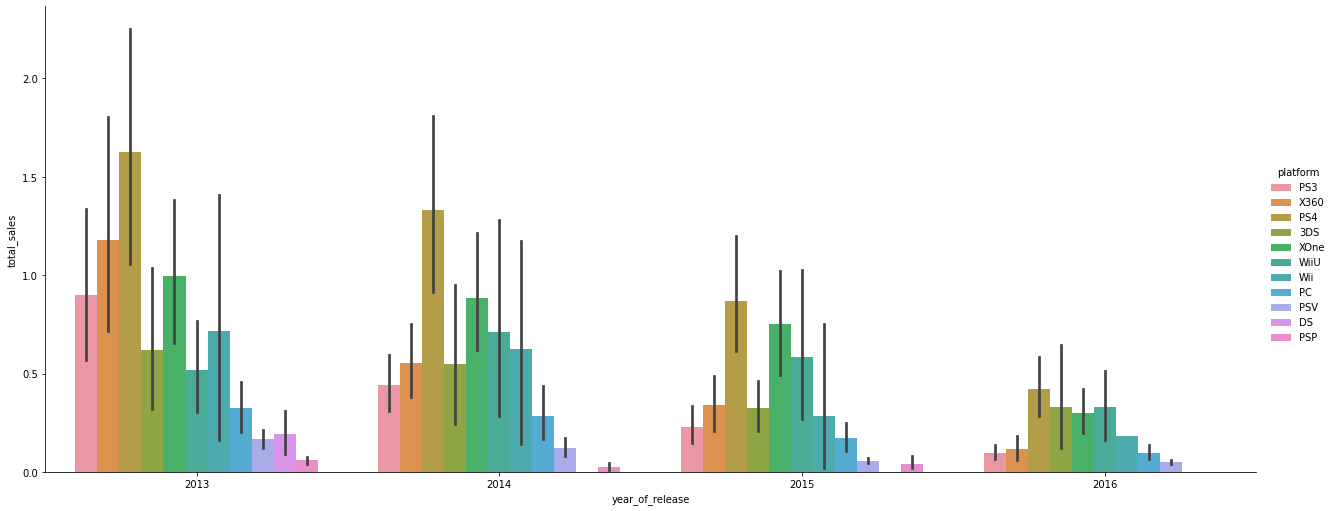

In [52]:
sns.catplot(x="year_of_release", y="total_sales", hue="platform", kind="bar", data=actual_new, height=7, aspect=2.5)
plt.show()

Платформы, которые ранее были выбраны в топ по продажам в предыдущем задании, к 2016 году пришли к окончанию своего цикла жизни на рынке.

Как видно  ,на графике  на 2016 год актуальными являются следующие платформы "PS4", "WiiU", "XOne", "PC", "3DS"

Рынок  прогрессирующе падает ,платформы PSP, PC, PSV имеют продажи, но  перспективными не являются .

На графиках видны две потенциально-перспективные платформы XOne и PS4. Они появились в 2013 году и  для планированя продаж 2017 года эти платформы наиболее перспективны

 ###  график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [53]:
actual_platforms = ["PS4", "WiiU", "XOne", "PC", "3DS"]

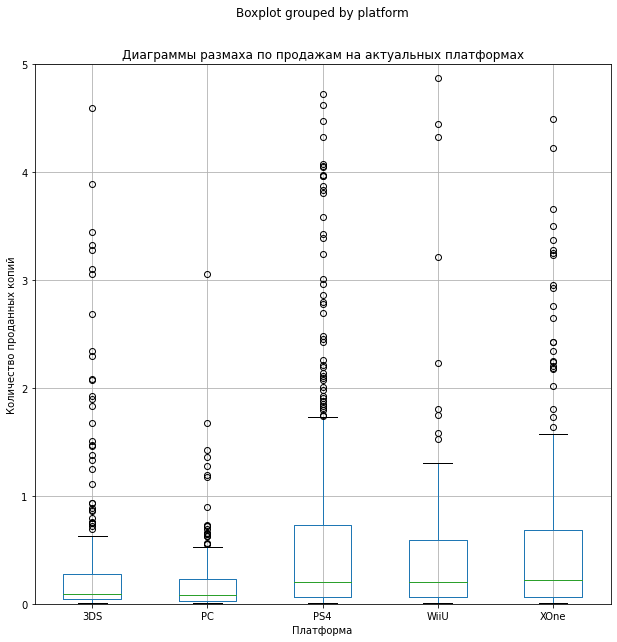

In [54]:
actual_new.query('platform in @actual_platforms')[['platform', 'total_sales']].boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(0, 5)
plt.show()

"Ящики с усами" платформ-лидеров "PS4"и "XOne"похожи,значит продажи были примерно равны. Выбросов на боксплотах у лидеров много  - это какие-то суперопулярные игры. Судя по похожим бокс-плотам платформы конкурирующие.

РС  - размах самый узкий, выбросов мало т.е. непопулярная , но стабильная платформа

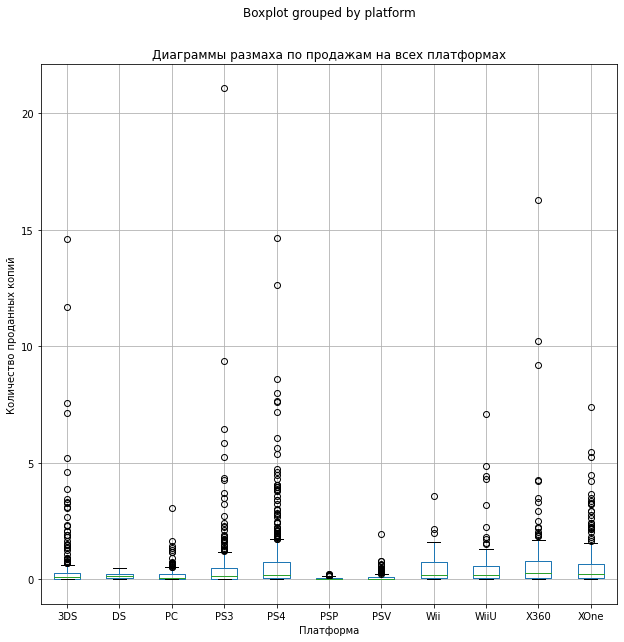

In [55]:
actual_new[['platform', 'total_sales']].boxplot(column='total_sales', by='platform', figsize=(10,10))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий')
plt.title('Диаграммы размаха по продажам на всех платформах')

plt.show()

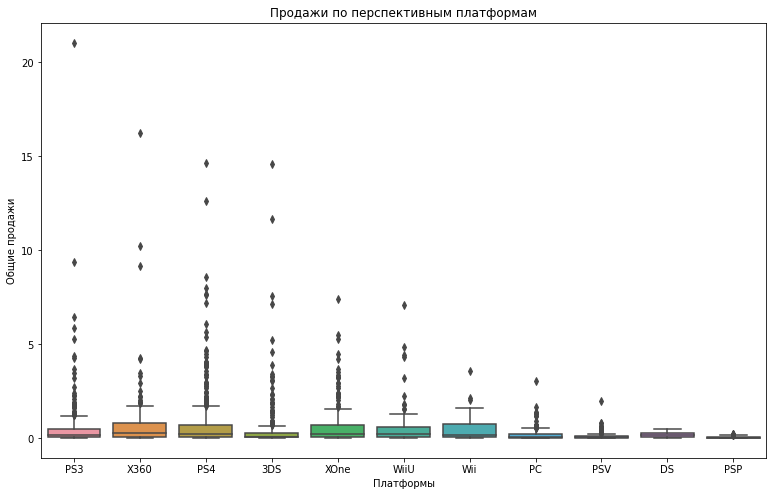

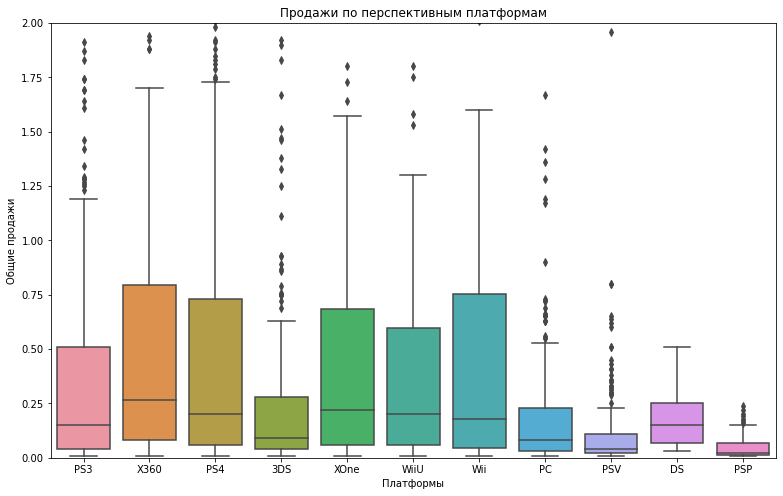

In [56]:
# Комментарий ревьюера 2
import seaborn as sns
data_temp, y = actual_new.copy(), 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

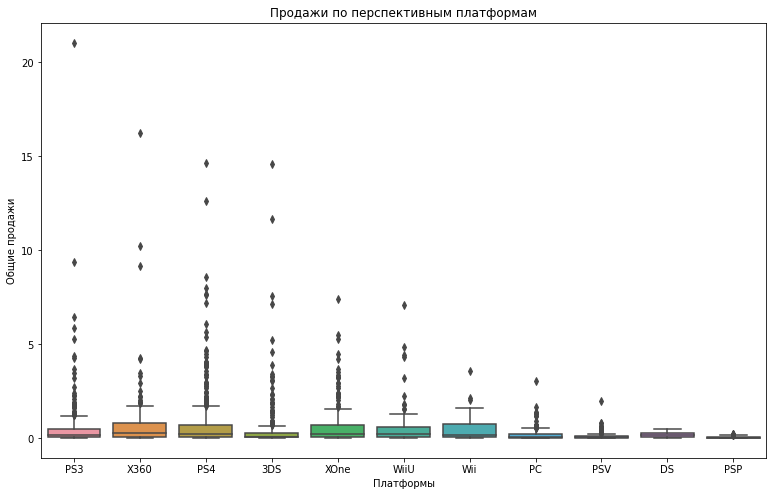

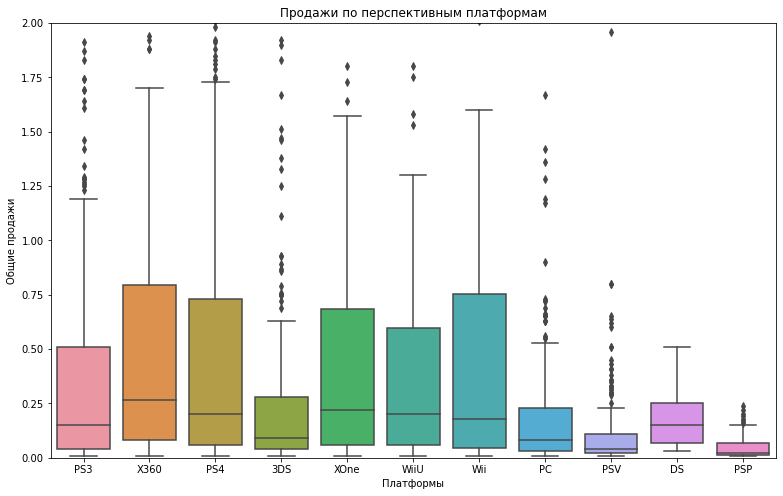

In [57]:
actual_new, y = actual_new.copy(), 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = actual_new, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = actual_new, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

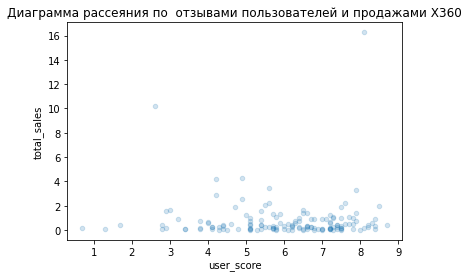

In [58]:
actual_new.loc[actual_new['platform'] == 'X360',['total_sales', 'critic_score', 'user_score']].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния по  отзывами пользователей и продажами X360')
plt.show()

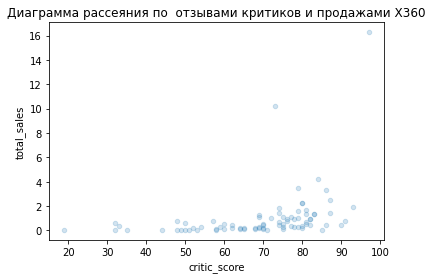

In [59]:
actual_new.loc[actual_new['platform'] == 'X360',['total_sales', 'critic_score', 'user_score']].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния по  отзывами критиков и продажами X360')
plt.show()

In [60]:
actual_corr_X360=actual_new.loc[actual_new['platform'] == 'X360',['total_sales', 'critic_score', 'user_score']].corr()
actual_corr_X360

,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


X360- слабо выраженное влияние критиков 0.35 ,нет влияния пользователей( отрицательная корреляция )

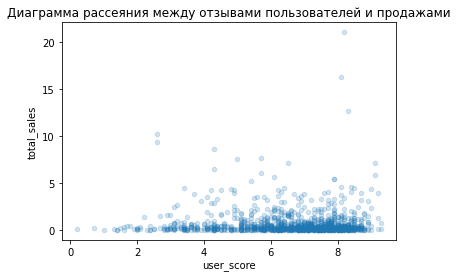

In [61]:
# Диаграмма рассеяния между отзывами пользователей и продажами по актуальным данным 
actual_new.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами')
plt.show()

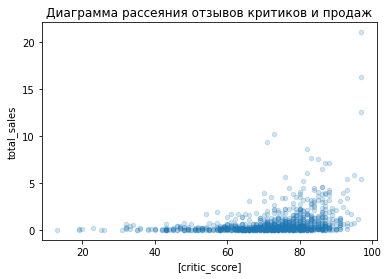

In [62]:
# Диаграмма рассеяния между отзывами критиков и продажами по актуальным данным 
actual_new.plot(x=['critic_score'], y='total_sales', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния отзывов критиков и продаж')
plt.show()

In [63]:
display('Коэффициент корреляции  продаж от отзывов пользователей:', 
       round(actual_new['user_score'].corr(actual_new['total_sales']), 3))

'Коэффициент корреляции  продаж от отзывов пользователей:'

-0.003

In [64]:
display('Коэффициент корреляции  продаж от отзывов критиков:', 
       round(actual_new['critic_score'].corr(actual_new['total_sales']), 3))

'Коэффициент корреляции  продаж от отзывов критиков:'

0.314

Выводы о корреляции продаж с отзывами   подобны, как для популярной платформы , так и по актуальным данным:  слабо выраженное влияние критиков 0.3 ,нет влияния пользователей( отрицательная корреляция )

'PS4'

'Коэффициент корреляции  продаж от отзывов пользователей:'

0.04

'Коэффициент корреляции  продаж от отзывов критиков:'

0.33

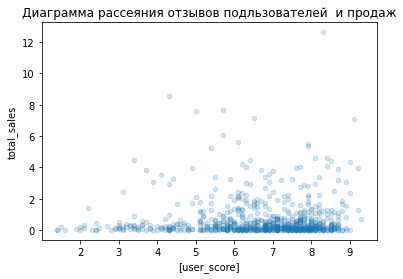

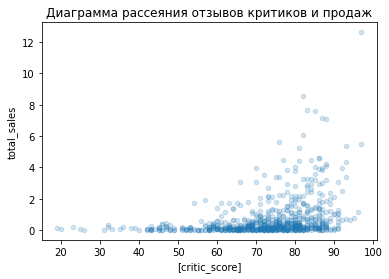

'WiiU'

'Коэффициент корреляции  продаж от отзывов пользователей:'

0.04

'Коэффициент корреляции  продаж от отзывов критиков:'

0.33

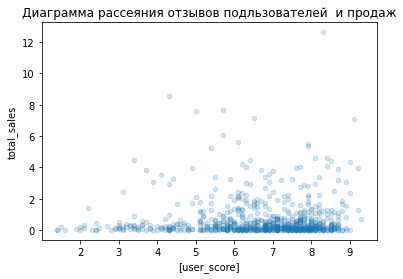

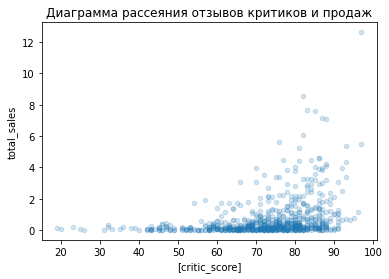

'XOne'

'Коэффициент корреляции  продаж от отзывов пользователей:'

0.04

'Коэффициент корреляции  продаж от отзывов критиков:'

0.33

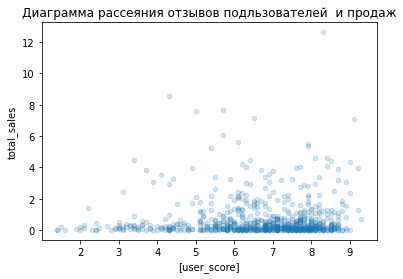

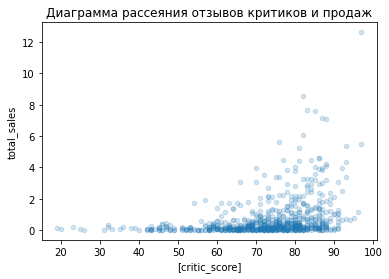

'PC'

'Коэффициент корреляции  продаж от отзывов пользователей:'

0.04

'Коэффициент корреляции  продаж от отзывов критиков:'

0.33

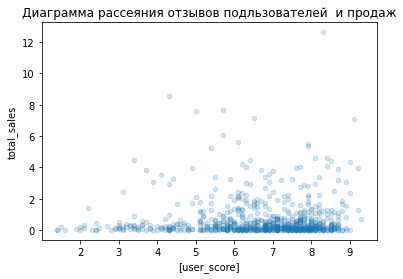

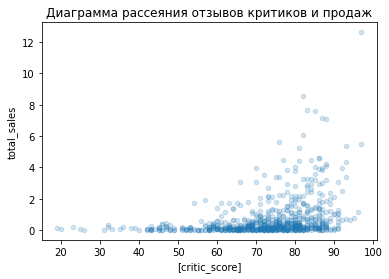

'3DS'

'Коэффициент корреляции  продаж от отзывов пользователей:'

0.04

'Коэффициент корреляции  продаж от отзывов критиков:'

0.33

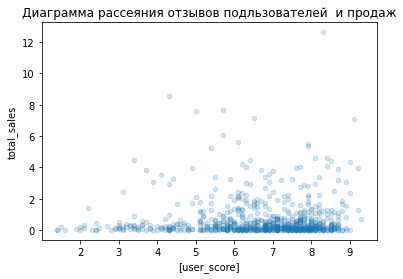

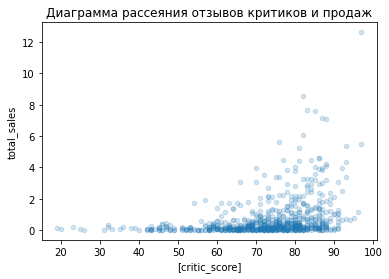

In [65]:
actual_new_platform=actual_new.query('platform == @actual_platforms')

for platform in actual_platforms :
    display(platform)
    display('Коэффициент корреляции  продаж от отзывов пользователей:', 
       round(actual_new_platform['user_score'].corr(actual_new_platform['total_sales']), 2))
    display('Коэффициент корреляции  продаж от отзывов критиков:', 
       round(actual_new_platform['critic_score'].corr(actual_new_platform['total_sales']), 2))
    actual_new_platform.plot(x=['user_score'], y='total_sales', kind='scatter', alpha=0.2)
    plt.title('Диаграмма рассеяния отзывов подльзователей  и продаж')
    plt.show()
    actual_new_platform.plot(x=['critic_score'], y='total_sales', kind='scatter', alpha=0.2)
    plt.title('Диаграмма рассеяния отзывов критиков и продаж')
    plt.show()
    

In [66]:
actual_corr_PS4=actual_new.loc[actual_new['platform'] == 'PS4',['total_sales', 'critic_score', 'user_score']].corr()
actual_corr_PS4

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


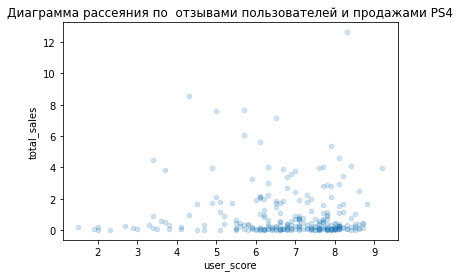

In [67]:
actual_new.loc[actual_new['platform'] == 'PS4',['total_sales', 'critic_score', 'user_score']].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния по  отзывами пользователей и продажами PS4')
plt.show()

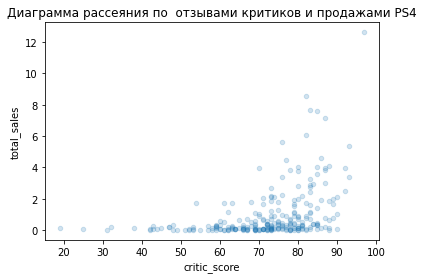

In [68]:
actual_new.loc[actual_new['platform'] == 'PS4',['total_sales', 'critic_score', 'user_score']].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния по  отзывами критиков и продажами PS4')
plt.show()

In [69]:
actual_corr_WiiU=actual_new.loc[actual_new['platform'] == 'WiiU',['total_sales', 'critic_score', 'user_score']].corr()
actual_corr_WiiU

,total_sales,critic_score,user_score
total_sales,1.000000,0.376415,0.419330
critic_score,0.376415,1.000000,0.721313
user_score,0.419330,0.721313,1.000000


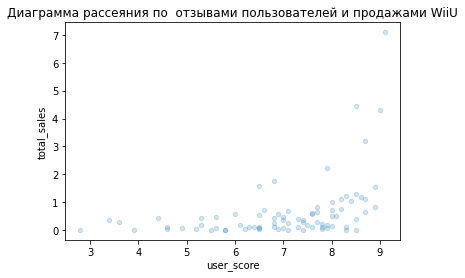

In [70]:
actual_new.loc[actual_new['platform'] == 'WiiU',['total_sales', 'critic_score', 'user_score']].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния по  отзывами пользователей и продажами WiiU')
plt.show()

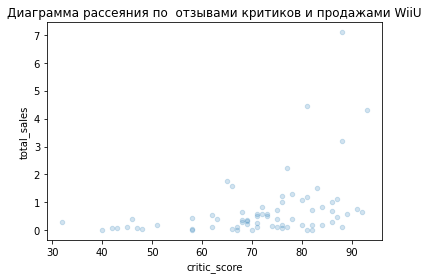

In [71]:
actual_new.loc[actual_new['platform'] == 'WiiU',['total_sales', 'critic_score', 'user_score']].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния по  отзывами критиков и продажами WiiU')
plt.show()

In [72]:
actual_corr_XOne=actual_new.loc[actual_new['platform'] == 'XOne',['total_sales', 'critic_score', 'user_score']].corr()
actual_corr_XOne

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


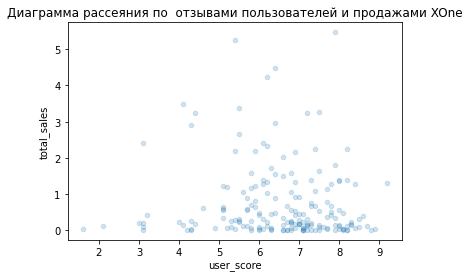

In [73]:
actual_new.loc[actual_new['platform'] == 'XOne',['total_sales', 'critic_score', 'user_score']].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния по  отзывами пользователей и продажами XOne')
plt.show()

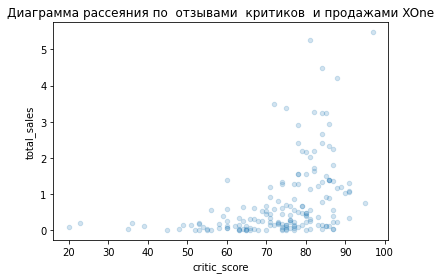

In [74]:
actual_new.loc[actual_new['platform'] == 'XOne',['total_sales', 'critic_score', 'user_score']].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния по  отзывами  критиков  и продажами XOne')
plt.show()

In [75]:
actual_corr_PC=actual_new.loc[actual_new['platform'] == 'PC',['total_sales', 'critic_score', 'user_score']].corr()
actual_corr_PC

,total_sales,critic_score,user_score
total_sales,1.000000,0.196030,-0.093842
critic_score,0.196030,1.000000,0.429562
user_score,-0.093842,0.429562,1.000000


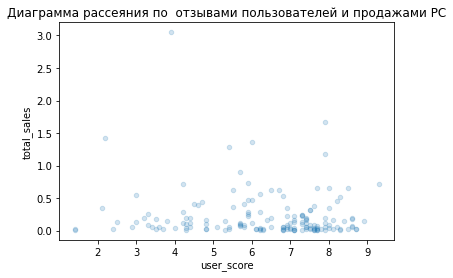

In [76]:
actual_new.loc[actual_new['platform'] == 'PC',['total_sales', 'critic_score', 'user_score']].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния по  отзывами пользователей и продажами PC')
plt.show()

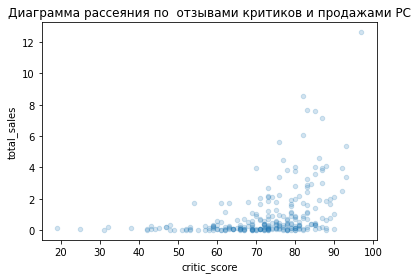

In [77]:
actual_new.loc[actual_new['platform'] == 'PS4',['total_sales', 'critic_score', 'user_score']].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния по  отзывами критиков и продажами PC')
plt.show()

In [78]:
actual_corr_3DS=actual_new.loc[actual_new['platform'] == '3DS',['total_sales', 'critic_score', 'user_score']].corr()
actual_corr_3DS

,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


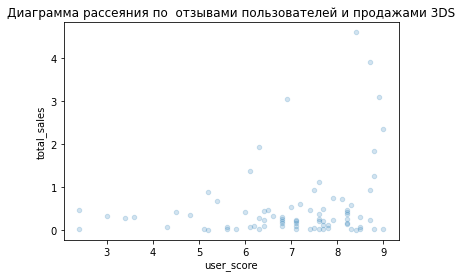

In [79]:
actual_new.loc[actual_new['platform'] == '3DS',['total_sales', 'critic_score', 'user_score']].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния по  отзывами пользователей и продажами 3DS')
plt.show()

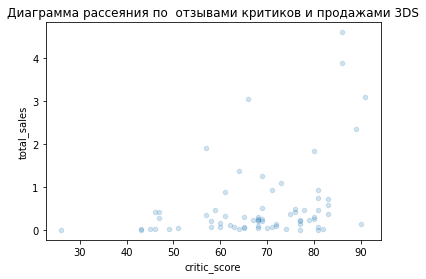

In [80]:
actual_new.loc[actual_new['platform'] == '3DS',['total_sales', 'critic_score', 'user_score']].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.2)
plt.title('Диаграмма рассеяния по  отзывами критиков и продажами 3DS')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkMagenta'>👉 А цикломможно сделать вот так:</font>

3DS


user_score     0.241504
total_sales    1.000000
Name: total_sales, dtype: float64

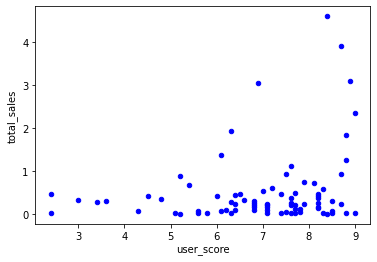

critic_score    0.357057
total_sales     1.000000
Name: total_sales, dtype: float64

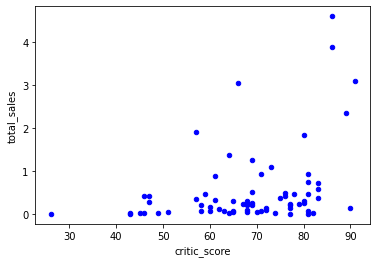

DS
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы DS не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
PC


user_score    -0.093842
total_sales    1.000000
Name: total_sales, dtype: float64

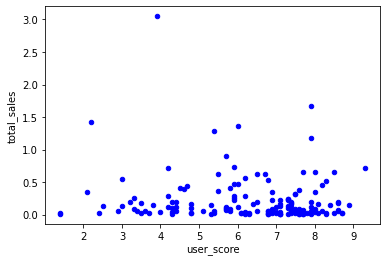

critic_score    0.19603
total_sales     1.00000
Name: total_sales, dtype: float64

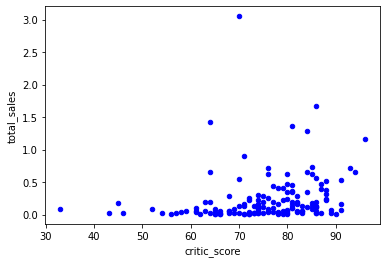

PS3


user_score     0.002394
total_sales    1.000000
Name: total_sales, dtype: float64

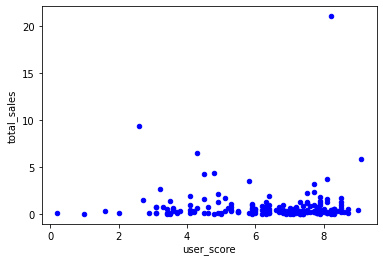

critic_score    0.334285
total_sales     1.000000
Name: total_sales, dtype: float64

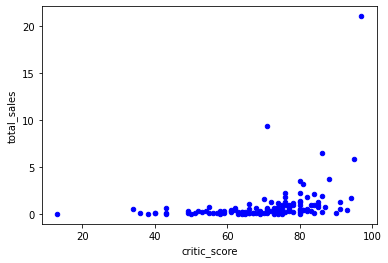

PS4


user_score    -0.031957
total_sales    1.000000
Name: total_sales, dtype: float64

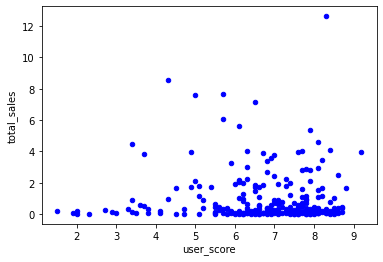

critic_score    0.406568
total_sales     1.000000
Name: total_sales, dtype: float64

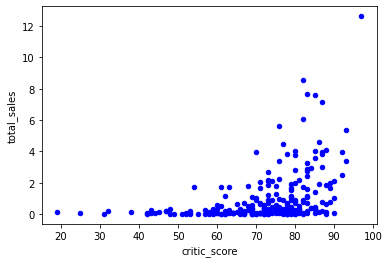

PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
PSV


user_score     0.000942
total_sales    1.000000
Name: total_sales, dtype: float64

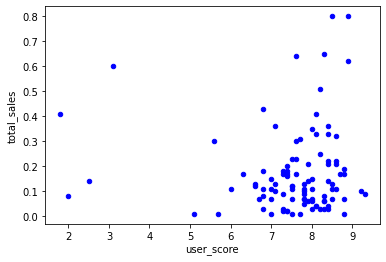

critic_score    0.254742
total_sales     1.000000
Name: total_sales, dtype: float64

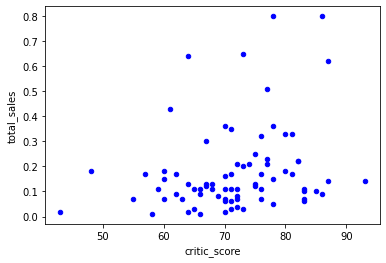

Wii
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
WiiU


user_score     0.41933
total_sales    1.00000
Name: total_sales, dtype: float64

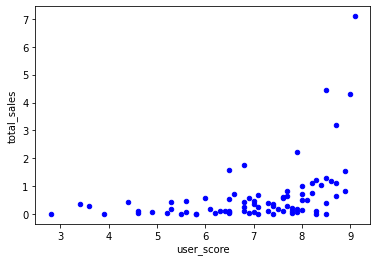

critic_score    0.376415
total_sales     1.000000
Name: total_sales, dtype: float64

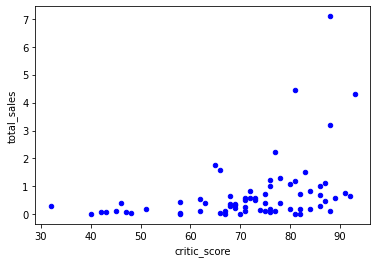

X360


user_score    -0.011742
total_sales    1.000000
Name: total_sales, dtype: float64

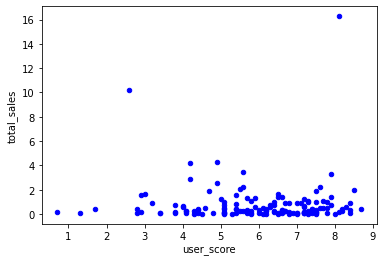

critic_score    0.350345
total_sales     1.000000
Name: total_sales, dtype: float64

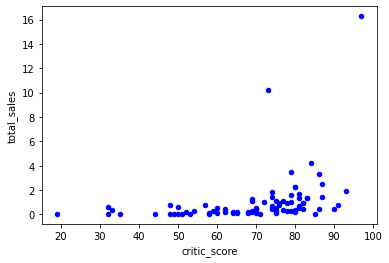

XOne


user_score    -0.068925
total_sales    1.000000
Name: total_sales, dtype: float64

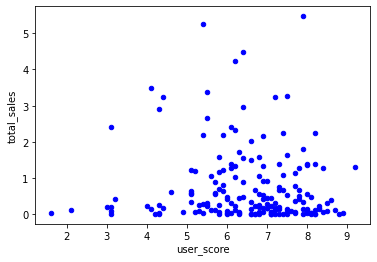

critic_score    0.416998
total_sales     1.000000
Name: total_sales, dtype: float64

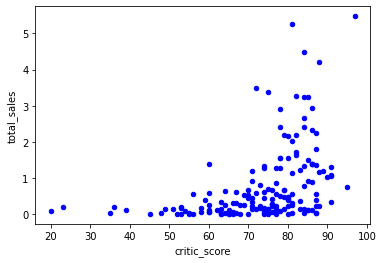

In [106]:
# Комментарий ревьюера 2
import matplotlib.pyplot as plt
df_sc, y = actual_new.copy(), 'total_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print(platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[games_on_pl['user_score'].notna() == True])
    not_critic = len(games_on_pl[games_on_pl['critic_score'].notna() == True])
    sum_not = 10 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl.plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[['user_score', y]].corr()[y])
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl.plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[['critic_score', y]].corr()[y])
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

 Значения корреляций  на платфомах отличаются, но общая тенденция  есть. Оценка критиков немного сильнее коррелирует с продажами, хотя эта связь и не является сильной. Корреляция оценок пользователей и продаж совсем слабая, иногда и вовсе отрицательная т.о.анализ не выявил сильной зависимости продаж от каких либо отзывов,что необходимо учесть в планировании продаж  

### Общее распределение игр по жанрам

Посмотрим на лидирующие жанры в выделенный актуальный период для всех платформ

In [81]:
df_genres_actual=actual_new.pivot_table(index='genre', values='total_sales',  aggfunc = 'median').sort_values(by='total_sales',ascending=False).reset_index()
df_genres_actual

,genre,total_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


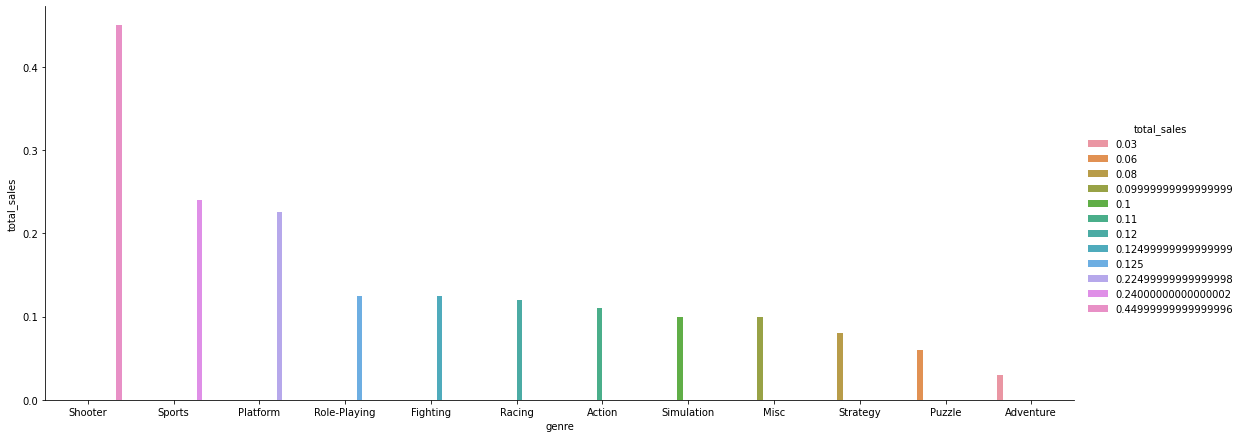

In [82]:
sns.catplot(x="genre", y="total_sales", hue="total_sales", kind="bar", data=df_genres_actual, height=6, aspect=2.5);

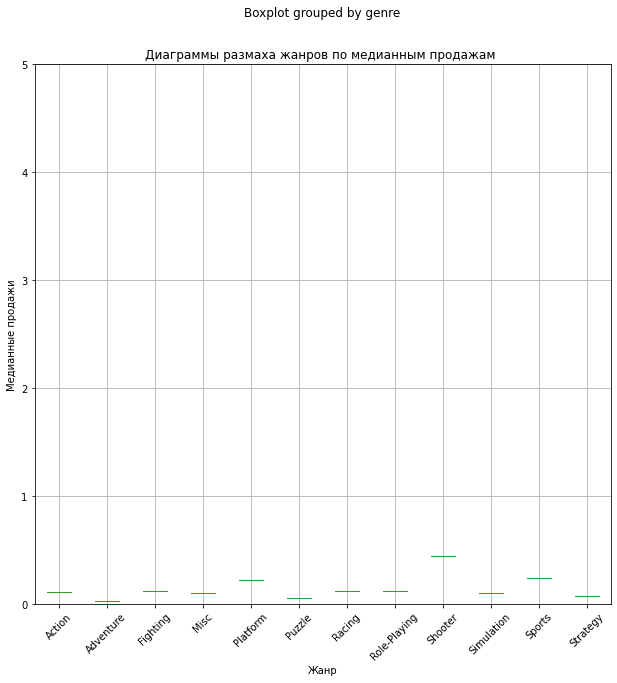

In [83]:
df_genres_actual.boxplot(column='total_sales', by='genre', figsize=(10,10))
plt.xlabel('Жанр')
plt.xticks(rotation = '45')
plt.ylabel('Медианные продажи')
plt.title('Диаграммы размаха жанров по медианным продажам ')
plt.ylim(0, 5)
plt.show()



По актуальным данным с 2013 
Лидеры в жанрах Shooter	,Sports	,Platform

Аутсайдеры  puzzle, strategy, adventure .    

##  Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)
 Берем данные за выделенный актульный период с 2013 года

In [84]:
# таблица топ платформ для рынка Северной Америки 
df_na_platform=actual_new.pivot_table(index='platform', values=['na_sales','total_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().head()

In [85]:
df_na_platform.sort_values(by='na_sales', ascending=False).reset_index().head()

,index,platform,na_sales,total_sales
0,0,PS4,108.74,314.14
1,1,XOne,93.12,159.32
2,2,X360,81.66,136.80
3,3,PS3,63.50,181.43
4,4,3DS,38.20,143.25


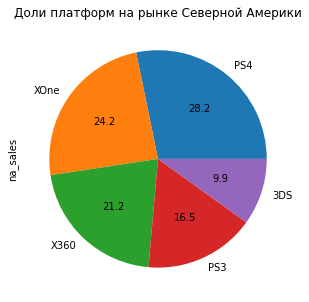

In [86]:
df_na_platform['na_sales'].plot(title = 'Доли платформ на рынке Северной Америки', kind='pie', autopct='%.1f', labels = ['PS4', 'XOne', 'X360', 'PS3', '3DS'] , figsize=(5,5))
plt.show()


In [87]:
# таблица топ платформ для рынка Европы 
df_eu_platform=actual_new.pivot_table(index='platform', values=['eu_sales','total_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().head()

In [88]:
df_eu_platform.sort_values(by='eu_sales', ascending=False).reset_index().head()

,index,platform,eu_sales,total_sales
0,0,PS4,141.09,314.14
1,1,PS3,67.81,181.43
2,2,XOne,51.59,159.32
3,3,X360,42.52,136.80
4,4,3DS,30.96,143.25


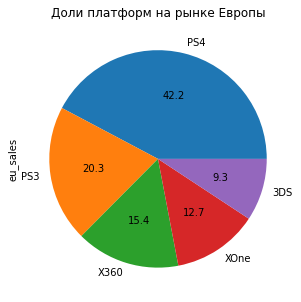

In [89]:
df_eu_platform['eu_sales'].plot(title = 'Доли платформ на рынке Европы', kind='pie', autopct='%.1f', labels = ['PS4', 'PS3', 'X360','XOne','3DS'] , figsize=(5,5))
plt.show()


In [90]:
# таблица топ платформ для рынка Японии 
df_jp_platform=actual_new.pivot_table(index='platform', values=['jp_sales','total_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().head()

In [91]:
df_jp_platform.sort_values(by='jp_sales', ascending=False).reset_index().head()

,index,platform,jp_sales,total_sales
0,0,3DS,67.81,143.25
1,1,PS3,23.35,181.43
2,2,PSV,18.59,32.99
3,3,PS4,15.96,314.14
4,4,WiiU,10.88,64.63


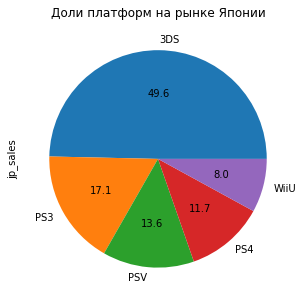

In [92]:
df_jp_platform['jp_sales'].plot(title = 'Доли платформ на рынке Японии', kind='pie', autopct='%.1f', labels = ['3DS','PS3','PSV','PS4', 'WiiU' ] , figsize=(5,5))
plt.show()

 В Европе и Северной Америке топ-5 плаформ одинаков хотя и в разном порядке: PS4,PS3,XOne,X360,3DS.
 Распределение достаточно равномерное.
 Относительно свежая PS4 уже набрала популярность
 
В Японии картина совсем иная: 
        
платформы X360 и XOne даже не вошли в топ5

лидируют платформы локальных корпораций  производителей Sony и  Nintendo
        
        

###  Самые популярные жанры (топ-5)по регионам 

In [93]:
# сводная таблица топ жанров в Северной Америке 
genre_na =actual_new.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
genre_na


,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


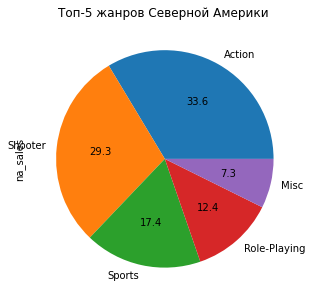

In [94]:
genre_na['na_sales'].plot(title = 'Топ-5 жанров Северной Америки ', kind='pie', autopct='%.1f', labels = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'] , figsize=(5,5))
plt.show()

In [95]:
# сводная таблица топ жанров в Европе
genre_eu =actual_new.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
genre_eu

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


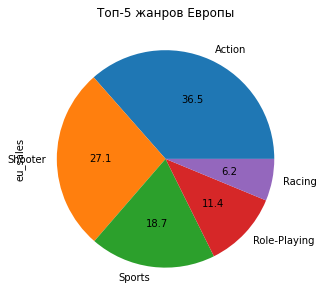

In [96]:
genre_eu['eu_sales'].plot(title = 'Топ-5 жанров Европы', kind='pie', autopct='%.1f', labels = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing'] , figsize=(5,5))
plt.show()

In [97]:
# сводная таблица топ жанров в Японии 
genre_jp =actual_new.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()
genre_jp

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


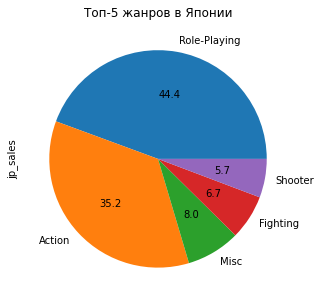

In [98]:
genre_jp['jp_sales'].plot(title = 'Топ-5 жанров в Японии', kind='pie', autopct='%.1f', labels = ['Role-Playing','Action','Misc','Fighting','Shooter'] , figsize=(5,5))
plt.show()

Регионы Европа и Северная Америка идентичны по своим предпочтениям жанров в топ-5.

В Европе и Северной Америке лидируют экшены,шутеры, спортивные игры 

В Японии экшены только на втором месте по популярности, лидируют - Role-Playing, а шутеры на пятой позиции.Racing в ТОП-5 характерен для Eвропы, как для Японии Fighting.

Жанры action,Shooter популярны во всех трёх регионах.
 
Можно сделать вывод, что  выбор жанров это следствие культурных особенностей



###  Влияние рейтинга ESRB на продажи в отдельном регионе

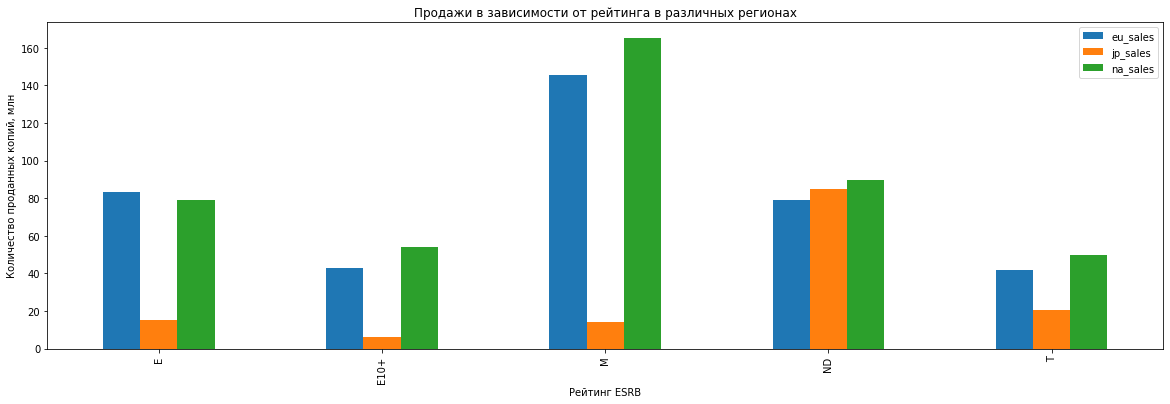

In [100]:
actual_new.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').plot(kind='bar', figsize=(20, 6))

plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий, млн')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

In [101]:
# Комментарий ревьюера
df_actual['rating'].value_counts()

ND      6315
E       3921
T       2903
M       1535
E10+    1392
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

ESRB — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США, Канаде т.е. Северной Америке.

PEGI — европейская рейтинговая система компьютерных и видеоигр 

CERO — японская рейтинговая организация


Таким образом  наиболее  показателен ESRB только в Севорной Америке.

Много игр с неопределенным рейтингом в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе
Поэтому в Японии  игры вовсе без этого рейтинга - судя по всему, это игры, созданные в Японии и получавшие рейтинг  в своей рейтинговой организации 


 Больше всего продаются игры с рейтингом "для взрослых". Следом идут игры для всех - игры,  имеющие самую широкую аудиторию.   





##  Проверка гипотез

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0(нулевая гипотеза): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1(альтернативная гипотеза): Средние пользовательские рейтинги платформ Xbox One и PC НЕ одинаковые(разные)

Значение критического уровня статистической значимости (альфа) примем равным 5%.Пропущенные значечния отфильтруем.


In [102]:
rating_user_xone = actual_new.loc[(df_actual['platform'] == 'XOne') & (df_actual.user_score.notna())]['user_score']
rating_user_xone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [103]:
rating_user_pc = actual_new.loc[(df_actual['platform'] == 'PC') & (df_actual.user_score.notna())]['user_score']
rating_user_pc

458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 155, dtype: float64

In [104]:
alpha=.05
results = st.ttest_ind(rating_user_xone,rating_user_pc)
display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


'p-значение:'

0.14012658403611647

Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

### Гипотеза 2 : Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые.

H1 - средние пользовательские рейтинги жанров Action и Sports разные.

Значение критического уровня статистической значимости (альфа) примем равным 5%.Пропущенные значения отфильтруем.


In [105]:
results = st.ttest_ind(
    actual_new[(actual_new.genre == "Action") & (actual_new.user_score.notna())]['user_score'], 
    actual_new[(actual_new.genre == "Sports") & (actual_new.user_score.notna())]['user_score']
)
alpha=.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Выводы пункта

формулировка гипотез
Обе гипотезы двусторонние.
Нулевая формулировалась исходя из равенства , значит альтернативная гипотеза обратна ей

Для оценки  использован критерий  значение p-value - вероятность совпадения 
Значение критического уровня статистической значимости (альфа) принят равным 5%.
 Если pvalue < alpha:есть основания отвергнуть нулевую гипотезу если больше то отвергнуть нулевую гипотезу не получается 




## Вывод :

В исследовании проведен анализ работы интернет-магазина компьютерных игр по данным о продажах из открытых источников до 2016 года.

Выявлены закономерности, определяющие успешность игры.Результаты исследования позволят определить потенциально успешный продукт для планирования эффективной рекламной компании на 2017 год

1. В анализе кол-ва выпусков игр в разные годы выявлено, что  максимальное кол-во приходится на 2008-2009 гг.С 2009 года идёт снижение количества  релизов. Представленные данные до 1994 года вследствие малого кол-ва релизов и временной данности( более 20 лет ) в дальней шем анализе не учитывались 
2. Заметен большой разброс по количеству лет работы платформ ,как среди всех данных так и в топовых платформах, медианный срок существования платформ около 8лет
Самая долгоживущая из платформ - РС(30 лет),хотя её ежегодные продажи не высоки. Для других ТОП-10 платформ характерен резкий рост в течение первого года-двух со времени релиза лет, плато около 2-3 лет, далее резкое падение

3. Для прогнозирования продаж на 2017 год определен актуальный период с 2013,основываясь среднем цикле жизни игровой платформы на рынке и динамике продаж, дальнейший анализ проведен  по данным актуального периода

4. Актуальными на 2016 год  являются следующие платформы "PS4", "WiiU", "XOne", "PC", "3DS"
   Рынок прогрессирующе падает ,платформы PSP, PC, PSV имеют продажи, но перспективными не являются .

5. Потенциально-перспективные платформы XOne и PS4. Они появились в 2013 году и для планированя продаж 2017 года эти платформы наиболее перспективны
 
6. Оценки критиков  и пользователей не оказывают существенного влияния на продажи

  
В рамках исследования составлен портрет пользователя по каждому региону:
 
  
  1. Топ платформ по регионам:
  
 - В Европе и Северной Америке топ-5 плаформ одинаков хотя и в разном порядке: PS4,PS3,XOne,X360,3DS. Распределение достаточно равномерное, что может говорить о высокой конкуренции.Относительно свежая PS4 уже набрала популярность

 - В Японии платформы X360 и XOne даже не вошли в топ5 Лидируют национальные платформы, которые продаются полностью или преимущественно в Японии (PSP, PSV, 3DS) национальных корпораций производителей

  2. Топ-5 жанров по регионам :
 
 - Регионы Европа и Северная Америка идентичны по своим предпочтениям жанров в топ-5.В Европе и Северной Америке лидируют экшены,шутеры, спортивные игры

 - В Японии экшены только на втором месте по популярности, лидируют - Role-Playing, а шутеры на пятой позиции.

 - Жанры action,Shooter популярны во всех трёх регионах.
 
 
В исследовании проведен анализ влияния  ли рейтинга ESRB
 
 
 1.Наиболее показателен ESRB только в Северной Америке, т.к. составлен именно для определения рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США, Канаде т.е. Северной Америке.

 2.Много игр с неопределенным рейтингом в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе

 3.В Японии игры вовсе без этого рейтинга - судя по всему, это игры, созданные в Японии и получавшие рейтинг в своей рейтинговой организации

 4.Больше всего продаются игры с рейтингом "для взрослых". Следом идут игры для всех - игры, имеющие самую широкую аудиторию.


В рамках исследования проведена проверка двух  гипотез


 Обе гипотезы двусторонние. Нулевая формулировалась исходя из равенства , значит альтернативная гипотеза обратна ей
Для оценки использован метод ttest_ind() который рассчитывает вероятность совпадения средних значений p-value. 
  Значение критического уровня статистической значимости (альфа) принят равным 5%.
  
 1. Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые,т.к.полученая вероятность совпадения значений больше критического уровня статистической значимости
  
 2. Гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные была отвергнута,т.к.полученая вероятность совпадения значений меньше критического уровня статистической значимости
  
  
Резюме :  При планировании рекламных бюджетов на 2017 г. стоит обратить внимание на  обширный рынок пользователей Европы и Северной Америки  во многом схожий в предпочтениях: самыми популярными платформами являются PS4 и XOne, любимые жанры - Shooter и Action, игры с рейтингом М. Оценки критиков  и пользователей не оказывают существенного влияния на продажи и в планировании могут не учитываться 

   Предпочтения пользователей из Японии существенно отличаются, самой популярной платформой являются 3DS, любимые жанры - Role-Playing и Action и игры с рейтингами  национальных  рейтинговых агенств 



 













